# Exercise 4.9 Part 2
# Table of content
## Importing libraries and dataframe
### 1. Descriptive findings about sales
### 2. Distribution of orders among customers based on their loyalty level 
### 3. Checking difference in expenditure depending of the hour of the day 
### 4. Analysis on customer demographics 
### 5. Checking connection between age and spending power 
### 6. Exporting the charts as png files

### Importing libraries and dataframe

In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [4]:
# Importing path and dataframe

path = r'C:\Users\salmi\Desktop\Projects\Achievement 4\Instacart Basket Analysis'

ords_prods_cust = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'ords_prods_cust_all_merged.pkl'))

### 1. Descriptive findings about sales

In [6]:
# I noticed I did a mistake by changing the datatype of order_hour_of day. So changing datatypes for that column

ords_prods_cust[['order_hour_of_day']] = ords_prods_cust [['order_hour_of_day']].astype('int64')

In [7]:
#checking datatypes
ords_prods_cust.dtypes

user_id                     object
gender                      object
state                       object
age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
order_id                    object
order_amount                 int64
orders_day_of_week          object
order_hour_of_day            int64
days_since_prior_order     float64
product_id                  object
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                    object
department_id               object
prices                     float64
price_range_loc             object
busiest_days                object
busiest_period_of_day       object
max_order                    int64
loyalty_flag                object
average_spend              float64
spender_flag                object
customer frequency         float64
frequency flag      

### Frequency of orders during the day 

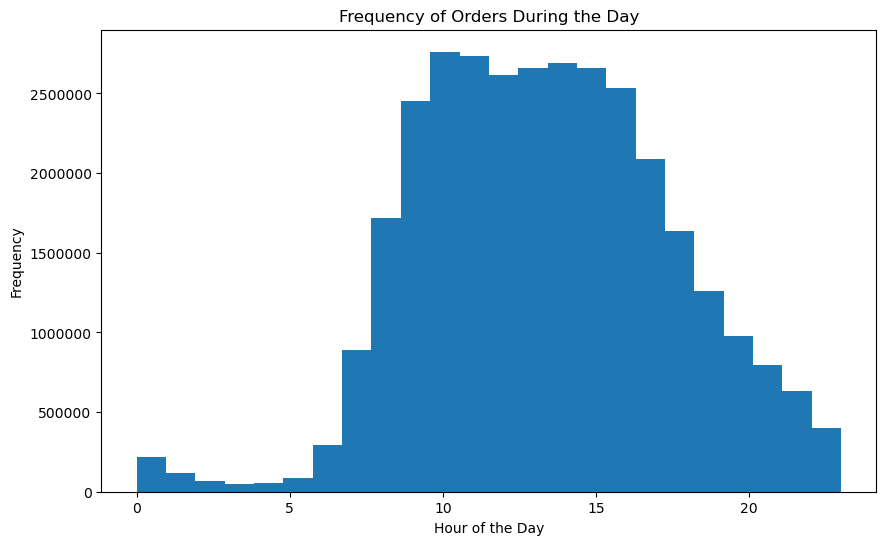

In [74]:
# Creating histogram of the order_hour_of_day column

plt.figure(figsize=(10, 6))
hist_ord_of_day = ords_prods_cust['order_hour_of_day'].plot.hist(bins=24)
hist_ord_of_day.set_title('Frequency of Orders During the Day')
hist_ord_of_day.set_xlabel('Hour of the Day')
hist_ord_of_day.set_ylabel('Frequency')
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'frequency of orders during the day.png'), bbox_inches = 'tight')
plt.show()

The histogram shows us the frequency of orders during different times of the day. 
As we can see, there is a significant peak in the number of orders starting around 10 am until 15 pm, and the orders stay quite high until the evening. However, between 12 am and early mornings, the orders are at their lowest. 
So it seems that most of the customers order their product preferably during day time, mainly between 10 am and 15pm

### 2. Distribution of orders among customers based on their loyalty level 

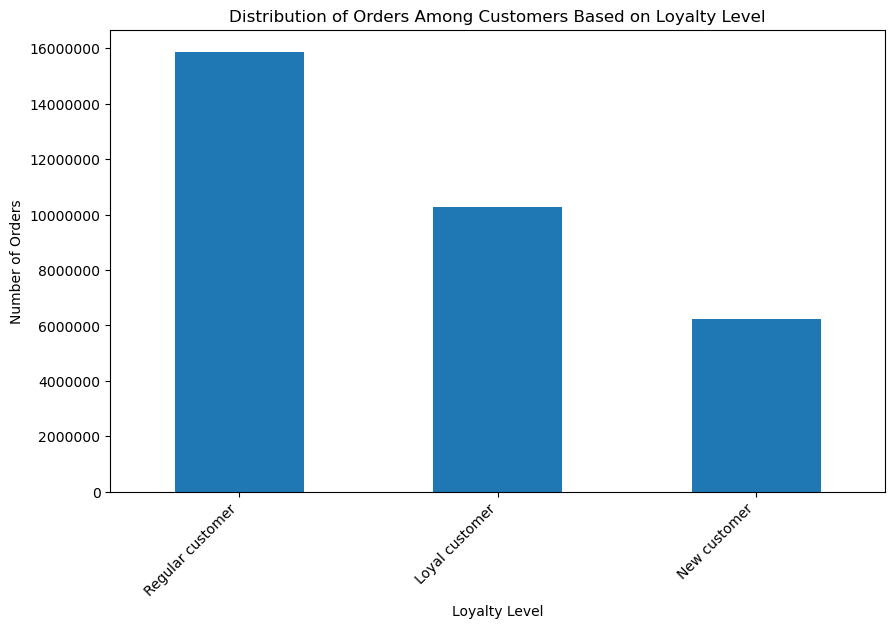

In [78]:
# Creating a bar chart based on the orders depending on the loyalty level

plt.figure(figsize=(10, 6))
bar_ords_loyalty = ords_prods_cust['loyalty_flag'].value_counts().plot.bar()
bar_ords_loyalty.set_title('Distribution of Orders Among Customers Based on Loyalty Level')
bar_ords_loyalty.set_xlabel('Loyalty Level')
bar_ords_loyalty.set_ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.ticklabel_format(style='plain', axis='y')  # Remove scientific notation
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'distribution of orders based loyalty level.png'), bbox_inches = 'tight')
plt.show()

The bar charts shows here that regular customer are actually the ones odering more. However this could be explain by the fact that the number of regular customer is higher than the number of loyal customer, which increase significantly their weight in the orders amount that this group generate.

### 3. Checking difference in expenditure depending of the hour of the day 

#### Creation of a sample of the dataframe

In [16]:
# Creating a list holding True/False values to the test np.random.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(ords_prods_cust)) <= 0.7

In [17]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [18]:
# Splitting dataframe into 2 samples

# Store 70% of the sample in the dataframe big
big = ords_prods_cust[dev]

# Store 30% of the sample in the dataframe small
small = ords_prods_cust[~dev]

In [19]:
# Testing out the samples
len(ords_prods_cust)

32404859

In [20]:
len(big) + len(small)

32404859

##### ---> As the dataframe is too big to process the whole rows and create the graph, the dataframe as been sampled and take only random values for the results

#### Creation of the charts for prices depending on the hour of the day

In [23]:
# Taking only the 2 columns necessary for chart

line_chart_1_hour_prices = small[['order_hour_of_day','prices']]

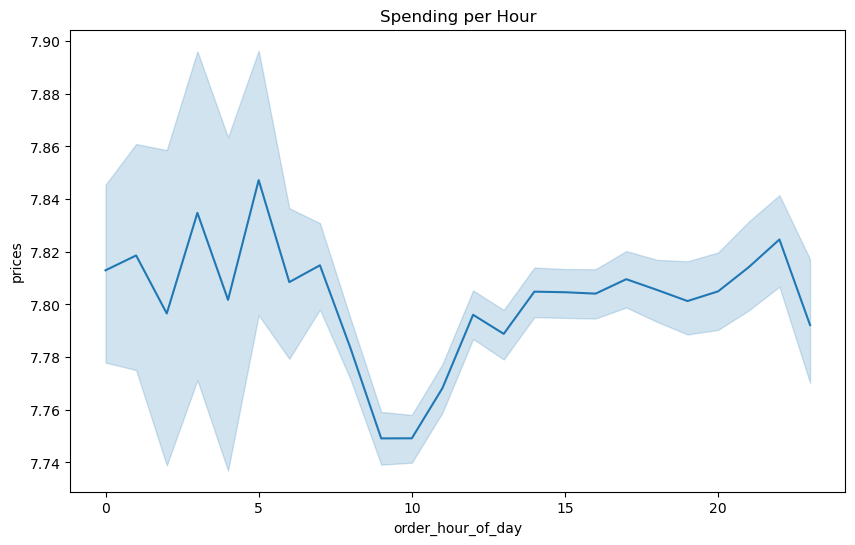

In [84]:
#Creation of the chart
plt.figure(figsize=(10, 6))
line_prices__per_hour = sns.lineplot(data = line_chart_1_hour_prices, x = 'order_hour_of_day',y = 'prices')
line_prices__per_hour.set_title('Spending per Hour')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'prices spending per hour.png'), bbox_inches = 'tight')
plt.show()

### 4.Analysis on customer demographics 

In [26]:
line_chart_2_age_dep = small[['age','n_dependants']]

In [27]:
# Checking the sampled data
line_chart_2_age_dep.head(10)

,age,n_dependants
0,48,3
2,48,3
3,48,3
6,48,3
10,48,3
12,48,3
13,48,3
19,36,0
21,36,0
22,36,0


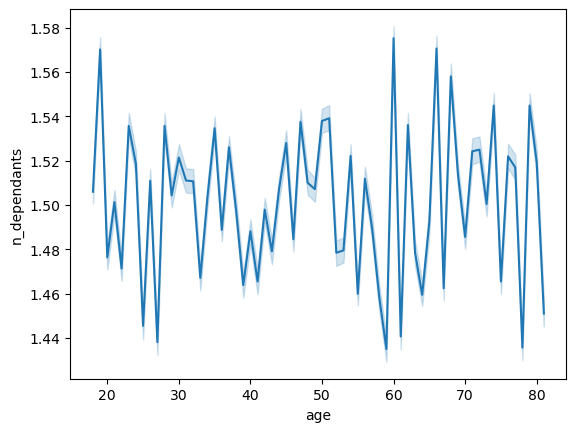

In [28]:
# Creation of the chart
line_age_dep = sns.lineplot(data = line_chart_2_age_dep, x = 'age',y = 'n_dependants')

Looking at the line chart, it is complicated to find any connection between the age of the customer and the number of dependants as there isn't any clear pattern that would permits us to assume that an individual's age plays a role in the number of dependants he/she has.

### 5.Checking connection between age and spending power 

In [31]:
# Creating a scatterplot based on the sampled population
sample_age_income = small[['age','income']]

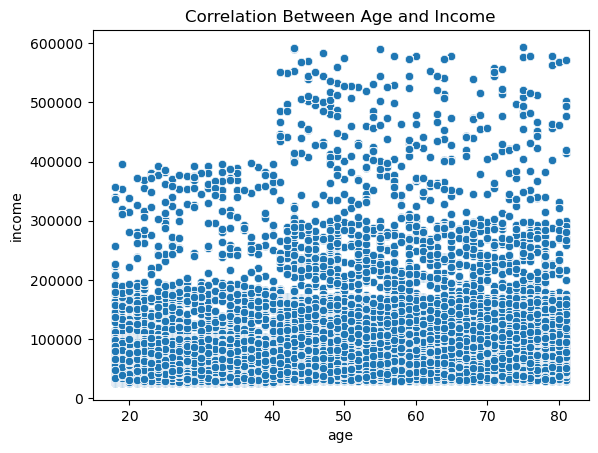

In [86]:
# Creation of the scatterplot chart for the connection between the age and the income
scatter_age_income = sns.scatterplot(x='age', y='income', data=sample_age_income)

# Add a title
scatter_age_income.set_title('Correlation Between Age and Income')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'scatter gae vs income.png'), bbox_inches = 'tight')

The chart shows that people over 40 tend to earn more than 400K per year. By targeting this group, Instacart could significantly make higher profit as this group has more buying power. However, we can see that the majority of the population earns 200K and less per year. SO having a marketing campaign that would efficiently send offer and discount might also be beneficial for Instacart.

### 6. Exporting the charts as png files

In [35]:
hist_ord_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_frequency_day.png'))

In [36]:
bar_ords_loyalty.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'order_based_loyalty.png'))

In [37]:
line_prices__per_hour.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prices_per_hour_day.png'))

In [38]:
line_age_dep.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'aged_based_dependants.png'))

In [39]:
scatter_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))

### 7. Exporting dataframe since datatypes has been updated

In [41]:
ords_prods_cust.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'orders_products_cust_all_merged_2.pkl'))